# NLP Anime quotes Classification & Sentiment Analysis

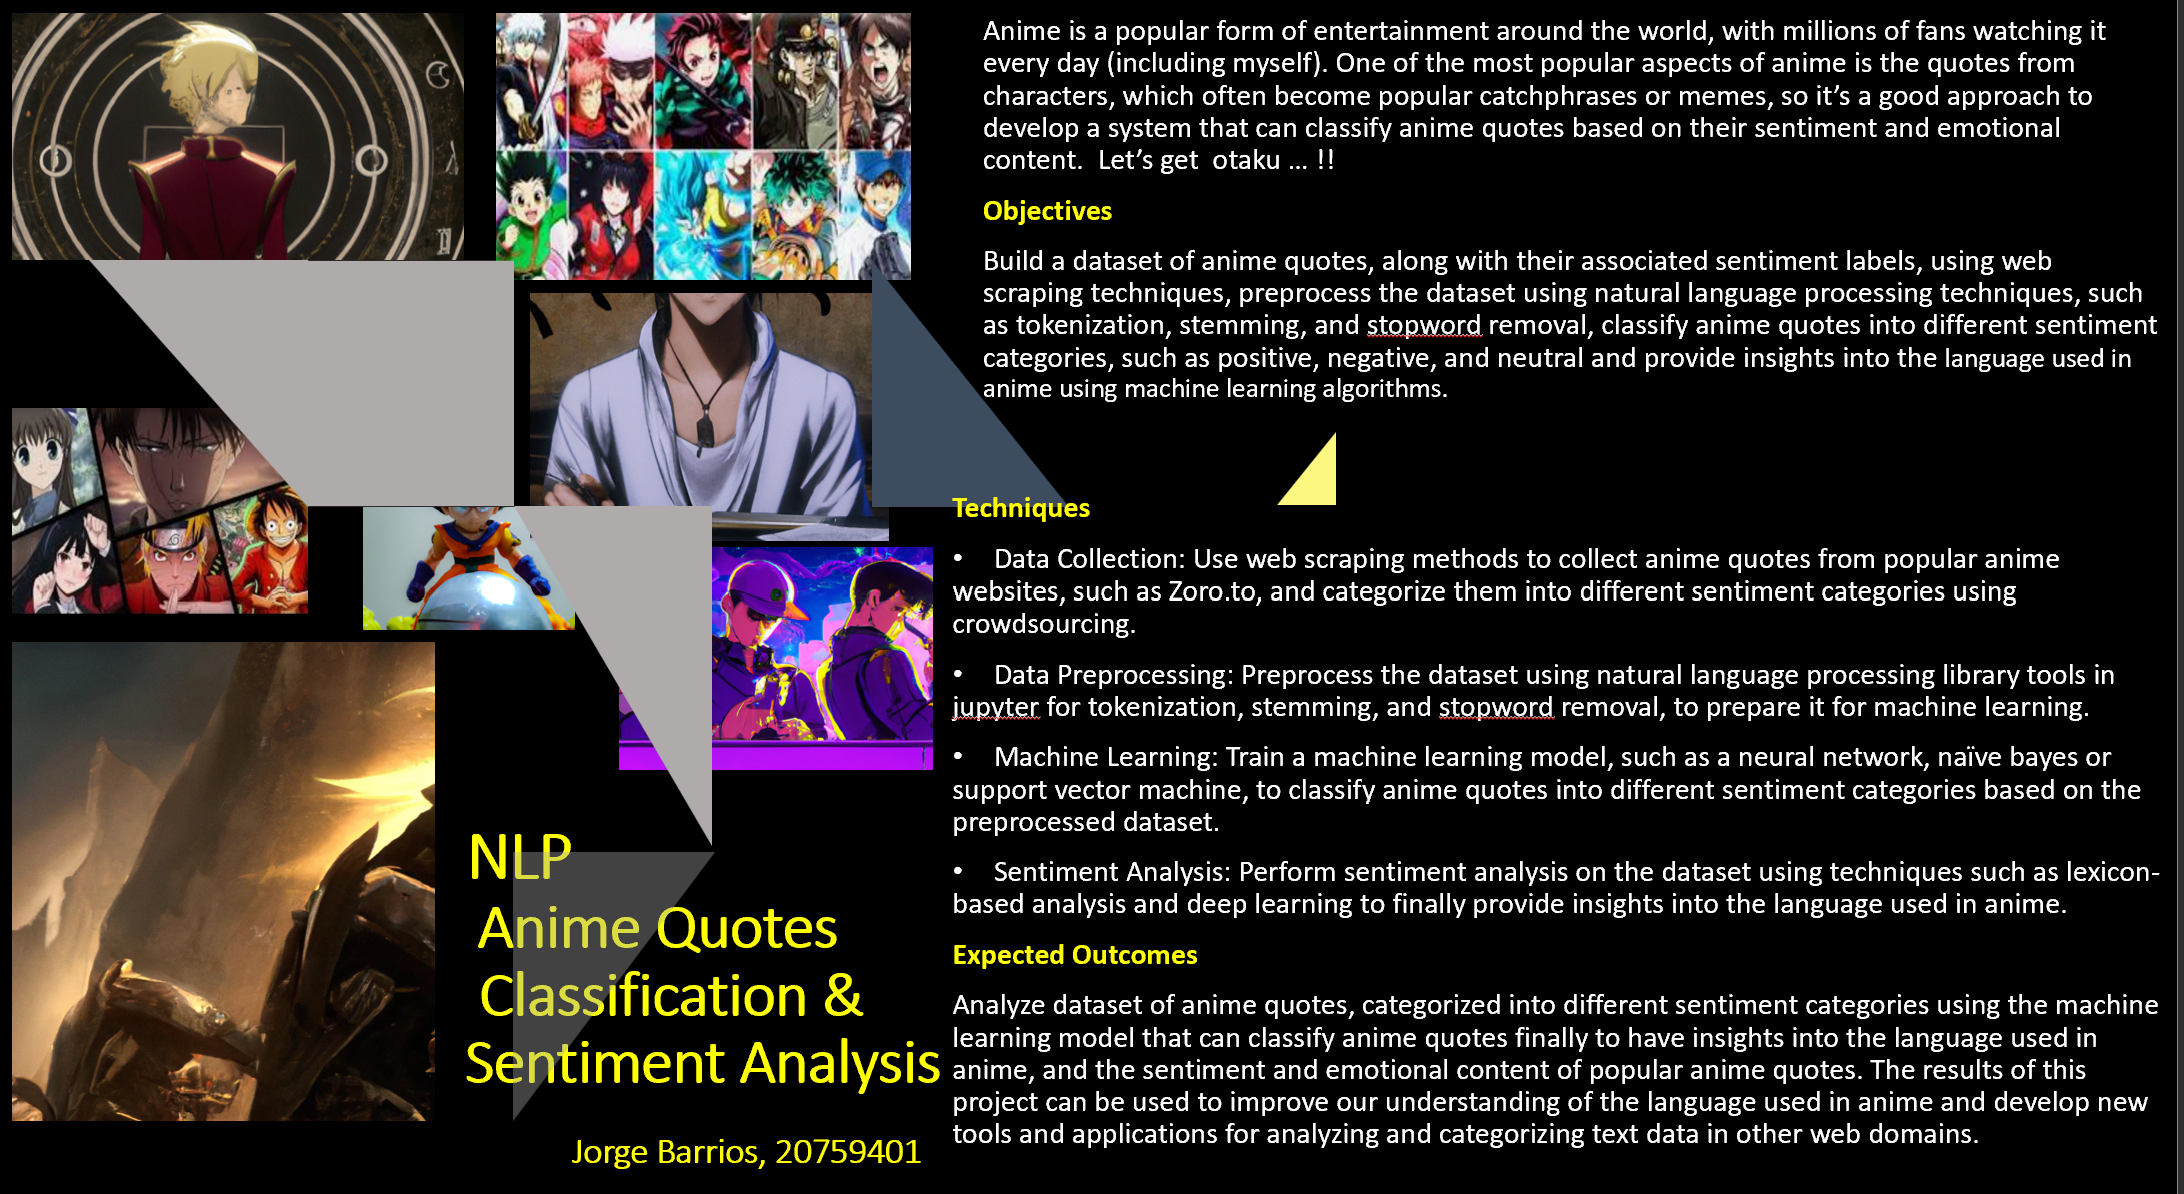

#####  Sources: DataSet downloaded from Kaggle and enrichment with other anime quotes from Zoro.to web page

**Loading ML packages**

In [1]:
import pandas as pd 
!pip install -U scikit-learn
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
!pip install textblob
!pip install nltk 
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
!pip install wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

**Transformers**

In [2]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

**İmport dataset**

In [3]:
anime = pd.read_csv("Anime_quotes_Zoro.csv", encoding="ISO-8859-1")
df = anime.copy()
df.head(4)

,Quote,Character,Anime
0,Acting is not necessarily compassion. True com...,Hinata Miyake,A Place Further than the Universe
1,"Sometimes, people are just mean. Don't fight m...",Hinata Miyake,A Place Further than the Universe
2,"When you hit the point of no return, thatâs ...",Hinata Miyake,A Place Further than the Universe
3,"The real adventure is not getting there, it's ...",Hinata Miyake,A Place Further than the Universe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quote      970 non-null    object
 1   Character  970 non-null    object
 2   Anime      970 non-null    object
dtypes: object(3)
memory usage: 22.9+ KB


In [5]:
df.shape

(970, 3)

**Check NaN values**

In [6]:
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
0,Quote,0.0
1,Character,0.0
2,Anime,0.0


**Removing NaN values**

In [7]:
df.dropna(inplace=True)

In [8]:
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
0,Quote,0.0
1,Character,0.0
2,Anime,0.0


**Removing duplicates**

In [9]:
df.Quote.drop_duplicates(inplace=True)

In [10]:
df.shape

(970, 3)

# Text Preprocessing

**Convert to lowercase**

In [11]:
df["Quote"] = df["Quote"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head(4)

,Quote,Character,Anime
0,acting is not necessarily compassion. true com...,Hinata Miyake,A Place Further than the Universe
1,"sometimes, people are just mean. don't fight m...",Hinata Miyake,A Place Further than the Universe
2,"when you hit the point of no return, thatâs ...",Hinata Miyake,A Place Further than the Universe
3,"the real adventure is not getting there, it's ...",Hinata Miyake,A Place Further than the Universe


**Removing numerical values**

In [12]:
df["Quote"] = df["Quote"].str.replace("\d","")
df.head(4)

,Quote,Character,Anime
0,acting is not necessarily compassion. true com...,Hinata Miyake,A Place Further than the Universe
1,"sometimes, people are just mean. don't fight m...",Hinata Miyake,A Place Further than the Universe
2,"when you hit the point of no return, thatâs ...",Hinata Miyake,A Place Further than the Universe
3,"the real adventure is not getting there, it's ...",Hinata Miyake,A Place Further than the Universe


**Removing punctations**

In [13]:
df["Quote"] = df["Quote"].str.replace("[^\w\s]","")
df.head(4)

,Quote,Character,Anime
0,acting is not necessarily compassion true comp...,Hinata Miyake,A Place Further than the Universe
1,sometimes people are just mean dont fight mean...,Hinata Miyake,A Place Further than the Universe
2,when you hit the point of no return thatâs the...,Hinata Miyake,A Place Further than the Universe
3,the real adventure is not getting there its th...,Hinata Miyake,A Place Further than the Universe


In [14]:
df.isna().sum()
df.head(4)

,Quote,Character,Anime
0,acting is not necessarily compassion true comp...,Hinata Miyake,A Place Further than the Universe
1,sometimes people are just mean dont fight mean...,Hinata Miyake,A Place Further than the Universe
2,when you hit the point of no return thatâs the...,Hinata Miyake,A Place Further than the Universe
3,the real adventure is not getting there its th...,Hinata Miyake,A Place Further than the Universe


In [15]:
df["Quote"].fillna("", inplace=True)
df.head(4)

,Quote,Character,Anime
0,acting is not necessarily compassion true comp...,Hinata Miyake,A Place Further than the Universe
1,sometimes people are just mean dont fight mean...,Hinata Miyake,A Place Further than the Universe
2,when you hit the point of no return thatâs the...,Hinata Miyake,A Place Further than the Universe
3,the real adventure is not getting there its th...,Hinata Miyake,A Place Further than the Universe


**STOPWORDS**

In [16]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["Quote"] = df["Quote"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ixoye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Lemmatization**

In [17]:
from textblob import Word
nltk.download("omw-1.4")
nltk.download("wordnet")
df["Quote"] = df["Quote"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ixoye\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ixoye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Word Tokenization**

In [18]:
from nltk.tokenize import word_tokenize
df["tokens"] = df["Quote"].apply(lambda x: TextBlob(x).words)
print (df["tokens"])

0      [acting, necessarily, compassion, true, compas...
1      [sometimes, people, mean, dont, fight, mean, m...
2      [hit, point, return, thatâs, moment, truly, be...
3                    [real, adventure, getting, journey]
4                          [dont, worry, failing, right]
                             ...                        
965         [order, become, best, willing, others, wont]
966    [true, strength, dominating, opponent, respect...
967                [way, truly, achieve, goals, believe]
968    [true, measure, champion, many, times, win, ha...
969      [way, truly, successful, never, stop, learning]
Name: tokens, Length: 970, dtype: object


**Frequency analysis**

In [19]:
df["frequency"] = df["Quote"].apply(lambda x: len(str(x).split(" "))) 

# Data Visualization

**We need convert all quotes to single text**

In [20]:
text = " ".join(i for i in df.Quote)

**Creating a wordcloud**

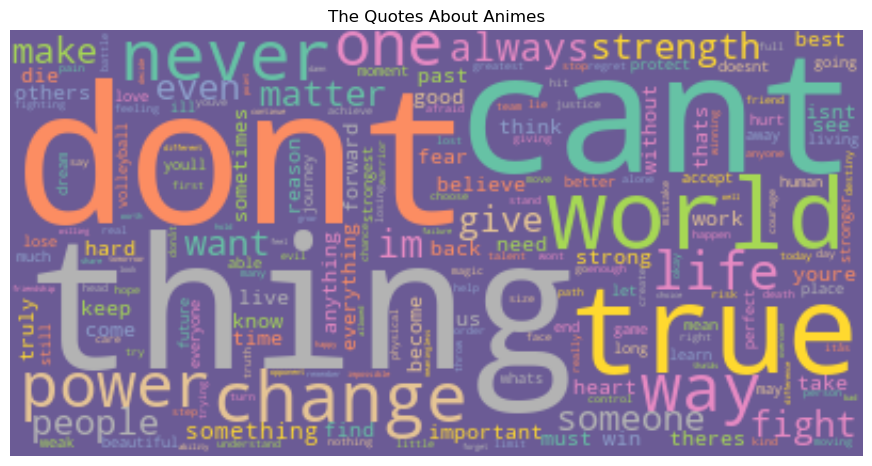

In [21]:
wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Quotes About Animes")
plt.show()

**Most common words**

In [22]:
print(
      text.count("thing"),
      text.count("one"),
      text.count("dont"),
      text.count("life"),
      text.count("people"),
      text.count("something"),
      text.count("accept"),
      text.count("lose"),
      text.count("world"),
     )

201 161 104 56 46 40 19 20 70


In [23]:
data = {
    "title": ["thing", "one" ,"dont", "life", "people", "something", 
              "accept","lose","world"],
    "count": [36, 34 ,22, 13, 13, 11, 10, 10, 9],
}

In [24]:
data = pd.DataFrame(data)
data.head()

,title,count
0,thing,36
1,one,34
2,dont,22
3,life,13
4,people,13


**Creating the pie chart**

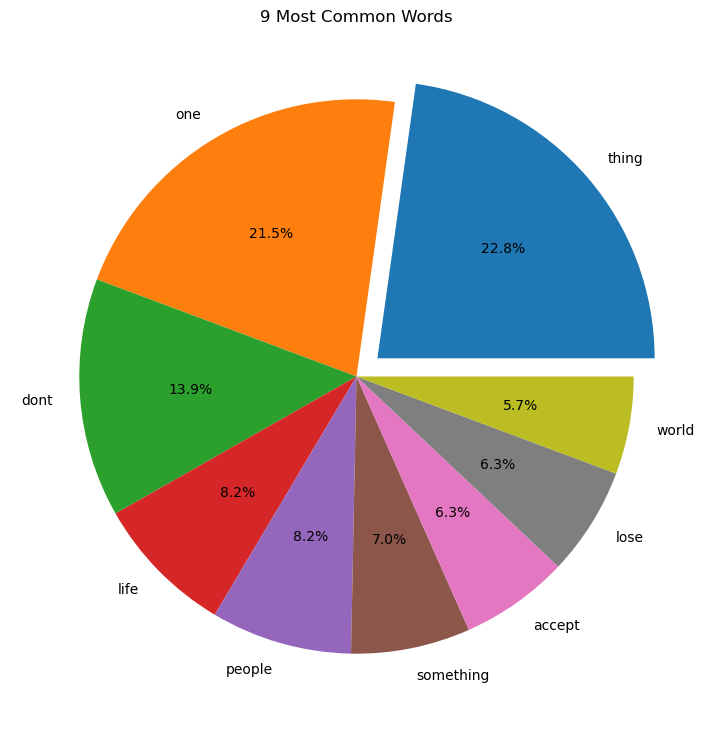

In [25]:
fig = plt.figure(figsize =(17, 9))
myexplode = [0.1, 0, 0, 0,0,0,0,0,0] 
plt.pie(data["count"], labels = data["title"], autopct='%1.1f%%', explode=myexplode)
plt.title("9 Most Common Words")

plt.show()

# Text Classification

**Train-test split**

In [26]:
from sklearn.model_selection import train_test_split
X = df.Quote
y = df.Anime
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

**Shape of train-test**

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((679,), (291,), (679,), (291,))

# Applying Naive Bayes
# Obtain Model, acc, f1, validation and training loss

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer


naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

naivebayes.fit(X_train, y_train)

y_pred = naivebayes.predict(X_test)


# Model No changes

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Naive Bayes pipeline
naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

# Fit the model on the training set
naivebayes.fit(X_train, y_train)

# Predict on the testing set
y_pred = naivebayes.predict(X_test)

# Calculate training loss
y_train_pred = naivebayes.predict(X_train)
train_loss = f1_score(y_train, y_train_pred, average='weighted')

# Calculate validation loss
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
y_val_pred = naivebayes.predict(X_val)
val_loss = f1_score(y_val, y_val_pred, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Training loss: {train_loss:.4f}')
print(f'Validation loss: {val_loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Training loss: 0.6291
Validation loss: 0.6640
Accuracy: 0.1237
F1 Score: 0.0817


In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Naive Bayes pipeline
naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

# Fit the model on the training set
naivebayes.fit(X_train, y_train)

# Predict on the testing set
y_pred = naivebayes.predict(X_test)

# Calculate training loss
y_train_pred = naivebayes.predict(X_train)
train_loss = f1_score(y_train, y_train_pred, average='weighted')

# Calculate validation loss
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
y_val_pred = naivebayes.predict(X_val)
val_loss = f1_score(y_val, y_val_pred, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Training loss: {train_loss:.4f}')
print(f'Validation loss: {val_loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Training loss: 0.6291
Validation loss: 0.6640
Accuracy: 0.1237
F1 Score: 0.0817


# Model Stop words

In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Naive Bayes pipeline
naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

# Fit the model on the training set
naivebayes.fit(X_train, y_train)

# Predict on the testing set
y_pred = naivebayes.predict(X_test)

# Calculate training loss
y_train_pred = naivebayes.predict(X_train)
train_loss = f1_score(y_train, y_train_pred, average='weighted')

# Calculate validation loss
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
y_val_pred = naivebayes.predict(X_val)
val_loss = f1_score(y_val, y_val_pred, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Training loss: {train_loss:.4f}')
print(f'Validation loss: {val_loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Training loss: 0.6291
Validation loss: 0.6640
Accuracy: 0.1237
F1 Score: 0.0817


**Adding a column named "predict"**

# Model Corrections

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Naive Bayes pipeline
naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

# Fit the model on the training set
naivebayes.fit(X_train, y_train)

# Predict on the testing set
y_pred = naivebayes.predict(X_test)

# Calculate training loss
y_train_pred = naivebayes.predict(X_train)
train_loss = f1_score(y_train, y_train_pred, average='weighted')

# Calculate validation loss
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
y_val_pred = naivebayes.predict(X_val)
val_loss = f1_score(y_val, y_val_pred, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Training loss: {train_loss:.4f}')
print(f'Validation loss: {val_loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Training loss: 0.6291
Validation loss: 0.6640
Accuracy: 0.1237
F1 Score: 0.0817


# Model punctuations

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Naive Bayes pipeline
naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

# Fit the model on the training set
naivebayes.fit(X_train, y_train)

# Predict on the testing set
y_pred = naivebayes.predict(X_test)

# Calculate training loss
y_train_pred = naivebayes.predict(X_train)
train_loss = f1_score(y_train, y_train_pred, average='weighted')

# Calculate validation loss
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
y_val_pred = naivebayes.predict(X_val)
val_loss = f1_score(y_val, y_val_pred, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Training loss: {train_loss:.4f}')
print(f'Validation loss: {val_loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Training loss: 0.6291
Validation loss: 0.6640
Accuracy: 0.1237
F1 Score: 0.0817


In [34]:
df["naive_bayes"] = naivebayes.predict(df["Quote"])

In [35]:
df.head()

,Quote,Character,Anime,tokens,frequency,naive_bayes
0,acting necessarily compassion true compassion ...,Hinata Miyake,A Place Further than the Universe,"[acting, necessarily, compassion, true, compas...",8,A Place Further than the Universe
1,sometimes people mean dont fight mean mean hol...,Hinata Miyake,A Place Further than the Universe,"[sometimes, people, mean, dont, fight, mean, m...",10,A Place Further than the Universe
2,hit point return thatâs moment truly becomes j...,Hinata Miyake,A Place Further than the Universe,"[hit, point, return, thatâs, moment, truly, be...",14,A Place Further than the Universe
3,real adventure getting journey,Hinata Miyake,A Place Further than the Universe,"[real, adventure, getting, journey]",4,A Place Further than the Universe
4,dont worry failing right,Gin Toudou,A Place Further than the Universe,"[dont, worry, failing, right]",4,A Place Further than the Universe


# Sentiment Analysis

**importing libraries**

In [36]:
!pip install textblob 
from textblob import TextBlob

**Applying sentiment textblob**

In [37]:
blob_emptyline2 = []

for i in df["Quote"]:
    blob = TextBlob(i).sentiment
    blob_emptyline2.append(blob)

**Convert to dataframe**

In [38]:
df_blob2 = pd.DataFrame(blob_emptyline2)

**Combining two datasets**

In [39]:
df_blob3 = pd.concat([df.reset_index(drop=True), df_blob2], axis=1)
df_blob3.head()

,Quote,Character,Anime,tokens,frequency,naive_bayes,polarity,subjectivity
0,acting necessarily compassion true compassion ...,Hinata Miyake,A Place Further than the Universe,"[acting, necessarily, compassion, true, compas...",8,A Place Further than the Universe,0.116667,0.550000
1,sometimes people mean dont fight mean mean hol...,Hinata Miyake,A Place Further than the Universe,"[sometimes, people, mean, dont, fight, mean, m...",10,A Place Further than the Universe,-0.194375,0.650625
2,hit point return thatâs moment truly becomes j...,Hinata Miyake,A Place Further than the Universe,"[hit, point, return, thatâs, moment, truly, be...",14,A Place Further than the Universe,0.100000,0.100000
3,real adventure getting journey,Hinata Miyake,A Place Further than the Universe,"[real, adventure, getting, journey]",4,A Place Further than the Universe,0.200000,0.300000
4,dont worry failing right,Gin Toudou,A Place Further than the Universe,"[dont, worry, failing, right]",4,A Place Further than the Universe,0.285714,0.535714


**Positive or negative ?**

In [40]:
df_blob3["Sentiment"] =  np.where(df_blob3["polarity"] >= 0 , "Positive", "Negative")

**The final version of dataset**

In [41]:
df_blob3.head()

,Quote,Character,Anime,tokens,frequency,naive_bayes,polarity,subjectivity,Sentiment
0,acting necessarily compassion true compassion ...,Hinata Miyake,A Place Further than the Universe,"[acting, necessarily, compassion, true, compas...",8,A Place Further than the Universe,0.116667,0.550000,Positive
1,sometimes people mean dont fight mean mean hol...,Hinata Miyake,A Place Further than the Universe,"[sometimes, people, mean, dont, fight, mean, m...",10,A Place Further than the Universe,-0.194375,0.650625,Negative
2,hit point return thatâs moment truly becomes j...,Hinata Miyake,A Place Further than the Universe,"[hit, point, return, thatâs, moment, truly, be...",14,A Place Further than the Universe,0.100000,0.100000,Positive
3,real adventure getting journey,Hinata Miyake,A Place Further than the Universe,"[real, adventure, getting, journey]",4,A Place Further than the Universe,0.200000,0.300000,Positive
4,dont worry failing right,Gin Toudou,A Place Further than the Universe,"[dont, worry, failing, right]",4,A Place Further than the Universe,0.285714,0.535714,Positive


# Result

In [42]:
result = df_blob3["Sentiment"].value_counts()

**Creating a barplot of result**

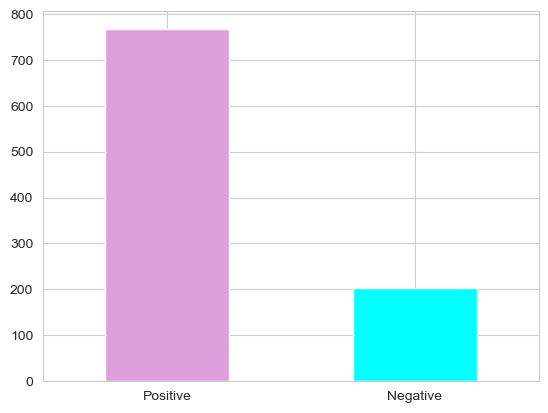

In [43]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

**Positive or negative quotes**

In [44]:
df_blob3.groupby("Sentiment").count()

,Quote,Character,Anime,tokens,frequency,naive_bayes,polarity,subjectivity
Sentiment,,,,,,,,
Negative,202,202,202,202,202,202,202,202
Positive,768,768,768,768,768,768,768,768


# SVM

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM pipeline
svm = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC(kernel='linear', C=1.0, random_state=42)),
              ])

# Fit the model on the training set
svm.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm.predict(X_test)

# Calculate training loss
y_train_pred = svm.predict(X_train)
train_loss = f1_score(y_train, y_train_pred, average='weighted')

# Calculate validation loss
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
y_val_pred = svm.predict(X_val)
val_loss = f1_score(y_val, y_val_pred, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Training loss: {train_loss:.3f}')
print(f'Validation loss: {val_loss:.3f}')
print(f'Accuracy: {accuracy:.3f}')
print(f'F1 Score: {f1:.3f}')

Training loss: 0.772
Validation loss: 0.814
Accuracy: 0.134
F1 Score: 0.129


### After the Report presentation during class on May 3rd, Ive been trying to run a BERT MODEL, as an observation from my classmates, unfortunatedly the accuracy is super low, so I will discart this model for my anime quotes...

In [47]:
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
import torch

# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Prepare the data
X = ["This is a positive example.", "This is a negative example."]
y = [1, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

# Convert the tokenized data into PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(y_train)
)
test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask']),
    torch.tensor(y_test)
)

# Train the model
model.train()
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True)
optim = torch.optim.Adam(model.parameters(), lr=5e-5)
for epoch in range(2):
    for batch in train_loader:
        optim.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optim.step()

# Evaluate the model
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2, shuffle=False)
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        accuracy = (predictions == labels).float().mean().item()
        print(f"Accuracy: {accuracy:.2f}")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Accuracy: 0.00


In [4]:
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import torch

# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

# Prepare the data
X = ["This is a positive example.", "This is a negative example."]
y = [1, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

# Convert the tokenized data into PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(y_train)
)
test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask']),
    torch.tensor(y_test)
)

# Train the model
model.train()
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True)
optim = torch.optim.Adam(model.parameters(), lr=5e-5)
for epoch in range(5):
    for batch in train_loader:
        optim.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optim.step()

        # Compute training loss and accuracy
        train_loss = loss.item()
        train_logits = outputs.logits
        train_predictions = torch.argmax(train_logits, dim=1)
        train_accuracy = (train_predictions == labels).float().mean().item()

    # Evaluate the model
    model.eval()
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2, shuffle=False)
    with torch.no_grad():
        predictions = []
        true_labels = []
        test_loss = 0
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            test_loss += loss.item()
            logits = outputs.logits
            batch_predictions = torch.argmax(logits, dim=1)
            predictions.extend(batch_predictions.tolist())
            true_labels.extend(labels.tolist())

        # Compute validation loss and accuracy
        test_loss /= len(test_loader)
        test_f1 = f1_score(true_labels, predictions)
        test_accuracy = (torch.tensor(predictions) == torch.tensor(true_labels)).float().mean().item()

    print(f"Epoch {epoch + 1}: train_loss={train_loss:.4f} train_accuracy={train_accuracy:.4f} "
          f"test_loss={test_loss:.4f} test_accuracy={test_accuracy:.4f} test_f1={test_f1:.4f}")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1: train_loss=1.0283 train_accuracy=1.0000 test_loss=1.3844 test_accuracy=0.0000 test_f1=0.0000
Epoch 2: train_loss=1.0449 train_accuracy=1.0000 test_loss=1.7805 test_accuracy=0.0000 test_f1=0.0000
Epoch 3: train_loss=0.7998 train_accuracy=1.0000 test_loss=2.0592 test_accuracy=0.0000 test_f1=0.0000
Epoch 4: train_loss=0.5699 train_accuracy=1.0000 test_loss=2.5038 test_accuracy=0.0000 test_f1=0.0000
Epoch 5: train_loss=0.4173 train_accuracy=1.0000 test_loss=2.6715 test_accuracy=0.0000 test_f1=0.0000
